# Peso-dollar exchange rate

Source: Bankers Association of the Philippines

Updated: December 31, 2023

*Purpose:* Create a single database of peso-US dollar exchange rate for the past 4 years. Currently, that set of data is collated by the **Bankers Association of the Philippines** in separate Google sheets. We downloaded the sheets as **Excel files** to process.

*To do:* Clean the data so that it can serve as a viable database.

*Method:* Python- pandas

*Way forward:* BAP only started releasing foreign exchange data in 2018 and prior to that, the [PDS Group](https://www.pds.com.ph/index.html%3Fpage_id=3626.html) was releasing the data.

## Do your imports

In [1]:
import numpy as np
import pandas as pd
from plotnine import *

## Read through the files and concat them

The Excel files from 2018 and 2019 **(except December 2019)** have a different structure from later files. We will begin with combining and cleaning 2018 and 2019 data first.

In [2]:
pd.set_option("display.max_columns", None)
df = pd.concat(pd.read_excel('raw_data/2018 BAP FX Summary.xlsx', sheet_name=None, na_values=["-"]), ignore_index=True)
df.head()

,DATE,TIME,OPEN,HIGH,LOW,CLOSE,BAP AM WEIGHTED AVERAGE,AM VOLUME,BAP PM WEIGHTED AVERAGE,PM VOLUME,BAP WEIGHTED AVERAGE,TOTAL VOLUME,FX SETTLEMENT RATE,Trades,tlast,ttime,topen,thi,tlow,tclose,tamwtave,tamvol,tpmwtave,tpmvol,tpdswtave,ttotvol
0,2018-12-03 00:00:00,09:00:25,52.350,52.395,52.275,52.32,52.357,451.20,52.315,514.4,52.335,965.60,52.357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-12-04 00:00:00,09:00:21,52.515,52.600,52.490,52.52,52.545,656.33,52.536,401.6,52.542,1057.93,52.545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-12-05 00:00:00,09:00:23,52.790,52.815,52.640,52.74,52.697,832.15,52.723,451.2,52.706,1283.35,52.697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-12-06 00:00:00,09:01:43,52.700,52.910,52.700,52.76,52.765,378.05,52.837,615.2,52.810,993.25,52.765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-12-07 00:00:00,09:00:17,52.689,52.730,52.600,52.71,52.648,486.15,52.665,487.8,52.656,973.95,52.648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df2 = pd.concat(pd.read_excel('raw_data/2019 BAP FX Summary.xlsx', sheet_name=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September','October', 'November'], na_values=["-"]), ignore_index=True)
df2.head()

,DATE,TIME,OPEN,HIGH,LOW,CLOSE,BAP AM WEIGHTED AVERAGE,AM VOLUME,BAP PM WEIGHTED AVERAGE,PM VOLUME,BAP WEIGHTED AVERAGE,TOTAL VOLUME,FX SETTLEMENT RATE
0,2019-01-02,09:00:45,52.50,52.630,52.500,52.515,52.586,370.7,52.544,209.35,52.571,580.05,52.586
1,2019-01-03,09:00:25,52.55,52.720,52.530,52.650,52.589,403.7,52.662,393.80,52.625,797.50,52.589
2,2019-01-04,09:01:13,52.62,52.630,52.510,52.510,52.569,405.3,52.546,279.65,52.560,684.95,52.569
3,2019-01-07,09:00:27,52.40,52.445,52.315,52.380,52.343,479.3,52.379,343.15,52.358,822.45,52.343
4,2019-01-08,09:04:11,52.39,52.490,52.380,52.470,52.447,415.4,52.462,383.50,52.454,798.90,52.447


### We combine them here.

In [4]:
df3 = pd.concat([df, df2])
df3

,DATE,TIME,OPEN,HIGH,LOW,CLOSE,BAP AM WEIGHTED AVERAGE,AM VOLUME,BAP PM WEIGHTED AVERAGE,PM VOLUME,BAP WEIGHTED AVERAGE,TOTAL VOLUME,FX SETTLEMENT RATE,Trades,tlast,ttime,topen,thi,tlow,tclose,tamwtave,tamvol,tpmwtave,tpmvol,tpdswtave,ttotvol
0,2018-12-03 00:00:00,09:00:25,52.350,52.395,52.275,52.320,52.357,451.20,52.315,514.40,52.335,965.60,52.357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-12-04 00:00:00,09:00:21,52.515,52.600,52.490,52.520,52.545,656.33,52.536,401.60,52.542,1057.93,52.545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-12-05 00:00:00,09:00:23,52.790,52.815,52.640,52.740,52.697,832.15,52.723,451.20,52.706,1283.35,52.697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-12-06 00:00:00,09:01:43,52.700,52.910,52.700,52.760,52.765,378.05,52.837,615.20,52.810,993.25,52.765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-12-07 00:00:00,09:00:17,52.689,52.730,52.600,52.710,52.648,486.15,52.665,487.80,52.656,973.95,52.648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,2019-11-25 00:00:00,09:00:28,50.850,50.850,50.740,50.755,50.781,656.75,50.785,546.50,50.783,1203.25,50.781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
226,2019-11-26 00:00:00,09:00:28,50.720,50.900,50.660,50.900,50.725,708.40,50.805,588.01,50.761,1296.41,50.725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,2019-11-27 00:00:00,09:00:28,50.840,50.920,50.800,50.800,50.874,408.30,50.842,449.95,50.857,858.25,50.874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
228,2019-11-28 00:00:00,09:00:28,50.820,50.870,50.700,50.705,50.828,587.00,50.759,458.55,50.798,1045.55,50.828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Cleaning the data

## Renaming the columns for easier access

In [5]:
df3.columns = df3.columns.str.lower()
df3.columns = df3.columns.str.replace(" ", "_")

## Fill up the NaNs in some columns and then remove some columns

So 2018 and 2019 data have varying names of columns that represented **the same values at different points of time**. For instance, **topen** in 2018 is the same with **OPEN** in 2019. We only need one version of those columns.

Before we drop the "duplicated" columns, we get the information under them and use them to fill the NaNs in the remaining column.

In [6]:
df3['open'].fillna(df3['topen'], inplace=True)
df3['close'].fillna(df3['tclose'], inplace=True)
df3['high'].fillna(df3['thi'], inplace=True)
df3['low'].fillna(df3['tlow'], inplace=True)
df3['am_volume'].fillna(df3['tamvol'], inplace=True)
df3['pm_volume'].fillna(df3['tpmvol'], inplace=True)
df3['total_volume'].fillna(df3['ttotvol'], inplace=True)
df3

,date,time,open,high,low,close,bap_am_weighted_average,am_volume,bap_pm_weighted_average,pm_volume,bap_weighted_average,total_volume,fx_settlement_rate,trades,tlast,ttime,topen,thi,tlow,tclose,tamwtave,tamvol,tpmwtave,tpmvol,tpdswtave,ttotvol
0,2018-12-03 00:00:00,09:00:25,52.350,52.395,52.275,52.320,52.357,451.20,52.315,514.40,52.335,965.60,52.357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-12-04 00:00:00,09:00:21,52.515,52.600,52.490,52.520,52.545,656.33,52.536,401.60,52.542,1057.93,52.545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-12-05 00:00:00,09:00:23,52.790,52.815,52.640,52.740,52.697,832.15,52.723,451.20,52.706,1283.35,52.697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-12-06 00:00:00,09:01:43,52.700,52.910,52.700,52.760,52.765,378.05,52.837,615.20,52.810,993.25,52.765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-12-07 00:00:00,09:00:17,52.689,52.730,52.600,52.710,52.648,486.15,52.665,487.80,52.656,973.95,52.648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,2019-11-25 00:00:00,09:00:28,50.850,50.850,50.740,50.755,50.781,656.75,50.785,546.50,50.783,1203.25,50.781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
226,2019-11-26 00:00:00,09:00:28,50.720,50.900,50.660,50.900,50.725,708.40,50.805,588.01,50.761,1296.41,50.725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,2019-11-27 00:00:00,09:00:28,50.840,50.920,50.800,50.800,50.874,408.30,50.842,449.95,50.857,858.25,50.874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
228,2019-11-28 00:00:00,09:00:28,50.820,50.870,50.700,50.705,50.828,587.00,50.759,458.55,50.798,1045.55,50.828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df3 = df3.drop(["tamwtave", "tamvol", "tpmwtave", "tpmvol", "tpdswtave", "ttotvol", "time", "topen", "thi", "tlow", "tclose"], axis=1)
df3= df3.drop(['bap_am_weighted_average', 'bap_pm_weighted_average', 'bap_weighted_average', 'ttime','tlast', 'trades', 'fx_settlement_rate'], axis=1)

## Change to datetime format and finalize

After this, we then go to the 2020,2021,2022 data.

In [8]:
df3.date = pd.to_datetime(df3.date, format="%Y-%m-%d")

In [9]:
df3 = df3.sort_values('date').reset_index()
df3 = df3.drop('index', axis=1)
df3.head()

,date,open,high,low,close,am_volume,pm_volume,total_volume
0,2018-02-01,51.30,51.59,51.30,51.58,553.10,325.05,878.15
1,2018-02-02,51.63,51.76,51.45,51.45,609.70,511.70,1121.40
2,2018-02-05,51.62,51.67,51.42,51.51,520.80,460.30,981.10
3,2018-02-06,51.65,51.65,51.46,51.46,625.10,295.20,920.30
4,2018-02-07,51.31,51.35,51.05,51.12,613.55,420.00,1033.55


## Data from 2020, 2021, 2022, 2023 (and a little bit of 2019)

Read through the excel files while combining all the worksheets inside of them.

In [10]:
df4= pd.concat(pd.read_excel('raw_data/2019 BAP FX Summary.xlsx', sheet_name=['December'], na_values=["-"]), ignore_index=True)
df5 = pd.concat(pd.read_excel('raw_data/2020 BAP FX Summary.xlsx', sheet_name=None, na_values=["-"]), ignore_index=True)
df6 = pd.concat(pd.read_excel('raw_data/2021 BAP FX Summary.xlsx', sheet_name=None, na_values=["-"]), ignore_index=True)
df7 = pd.concat(pd.read_excel('raw_data/2022 BAP FX Summary.xlsx', sheet_name=None, na_values=["-"]), ignore_index=True)
df9 = pd.concat(pd.read_excel('raw_data/2023 BAP FX Summary.xlsx', sheet_name=None, na_values=["-"]), ignore_index=True)
df8 = pd.concat([df4, df5, df6, df7, df9])
df8

Unnamed: 0 2019-12-02 00:00:00 2019-12-03 00:00:00  \
0                       TIME            09:00:28            09:00:28   
1                       OPEN               50.85               51.08   
2                       HIGH               51.08              51.135   
3                        LOW               50.79               50.95   
4                      CLOSE               51.08              50.951   
..                       ...                 ...                 ...   
139  BAP PM WEIGHTED AVERAGE                 NaN                 NaN   
140                PM VOLUME                 NaN                 NaN   
141     BAP WEIGHTED AVERAGE                 NaN                 NaN   
142             TOTAL VOLUME                 NaN                 NaN   
143       FX SETTLEMENT RATE                 NaN                 NaN   

    2019-12-04 00:00:00 2019-12-05 00:00:00 2019-12-06 00:00:00  \
0              09:00:28            09:00:28            09:00:28   
1                  51.1               50.95               50.72   
2                 51.15               50.95               50.79   
3                50.975               50.78               50.72   
4                 51.02                50.8              50.765   
..                  ...                 ...                 ...   
139                 NaN                 NaN                 NaN   
140                 NaN                 NaN                 NaN   
141                 NaN                 NaN                 NaN   
142                 NaN                 NaN                 NaN   
143                 NaN                 NaN                 NaN   

    2019-12-09 00:00:00 2019-12-10 00:00:00 2019-12-11 00:00:00  \
0              09:00:28            09:00:28            09:00:28   
1                 50.83               50.82                50.7   
2                50.875               50.82               50.87   
3                 50.77                50.7              50.695   
4                 50.77              50.735               50.81   
..                  ...                 ...                 ...   
139                 NaN                 NaN                 NaN   
140                 NaN                 NaN                 NaN   
141                 NaN                 NaN                 NaN   
142                 NaN                 NaN                 NaN   
143                 NaN                 NaN                 NaN   

    2019-12-12 00:00:00 2019-12-13 00:00:00 2019-12-16 00:00:00  \
0              09:00:28            09:00:28            09:00:28   
1                 50.79                50.5               50.65   
2                 50.79              50.645               50.67   
3                  50.7               50.46               50.57   
4                50.711               50.64              50.635   
..                  ...                 ...                 ...   
139                 NaN                 NaN                 NaN   
140                 NaN                 NaN                 NaN   
141                 NaN                 NaN                 NaN   
142                 NaN                 NaN                 NaN   
143                 NaN                 NaN                 NaN   

    2019-12-17 00:00:00 2019-12-18 00:00:00 2019-12-19 00:00:00  \
0              09:00:28            09:00:28            09:00:28   
1                  50.6               50.57               50.61   
2                50.625               50.65              50.665   
3                 50.58               50.56               50.61   
4                 50.58              50.631              50.635   
..                  ...                 ...                 ...   
139                 NaN                 NaN                 NaN   
140                 NaN                 NaN                 NaN   
141                 NaN                 NaN                 NaN   
142                 NaN                 NaN                 NaN   
1

As you can see this is a differently structured data-- the dates are serving as columns. To combine them with our first finalized df, we have to change them into a similar format. We use **transpose** for that.

In [11]:
df8 = df8.transpose()
df8.head()

,0,1,2,3,4,5,6,7,8,9,10,11,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143
Unnamed: 0,TIME,OPEN,HIGH,LOW,CLOSE,BAP AM WEIGHTED AVERAGE,AM VOLUME,BAP PM WEIGHTED AVERAGE,PM VOLUME,BAP WEIGHTED AVERAGE,TOTAL VOLUME,FX SETTLEMENT RATE,TIME,OPEN,HIGH,LOW,CLOSE,BAP AM WEIGHTED AVERAGE,AM VOLUME,BAP PM WEIGHTED AVERAGE,PM VOLUME,BAP WEIGHTED AVERAGE,TOTAL VOLUME,FX SETTLEMENT RATE,TIME,OPEN,HIGH,LOW,CLOSE,BAP AM WEIGHTED AVERAGE,AM VOLUME,BAP PM WEIGHTED AVERAGE,PM VOLUME,BAP WEIGHTED AVERAGE,TOTAL VOLUME,FX SETTLEMENT RATE,TIME,OPEN,HIGH,LOW,CLOSE,BAP AM WEIGHTED AVERAGE,AM VOLUME,BAP PM WEIGHTED AVERAGE,PM VOLUME,BAP WEIGHTED AVERAGE,TOTAL VOLUME,FX SETTLEMENT RATE,TIME,OPEN,HIGH,LOW,CLOSE,BAP AM WEIGHTED AVERAGE,AM VOLUME,BAP PM WEIGHTED AVERAGE,PM VOLUME,BAP WEIGHTED AVERAGE,TOTAL VOLUME,FX SETTLEMENT RATE,TIME,OPEN,HIGH,LOW,CLOSE,BAP AM WEIGHTED AVERAGE,AM VOLUME,BAP PM WEIGHTED AVERAGE,PM VOLUME,BAP WEIGHTED AVERAGE,TOTAL VOLUME,FX SETTLEMENT RATE,TIME,OPEN,HIGH,LOW,CLOSE,BAP AM WEIGHTED AVERAGE,AM VOLUME,BAP PM WEIGHTED AVERAGE,PM VOLUME,BAP WEIGHTED AVERAGE,TOTAL VOLUME,FX SETTLEMENT RATE,TIME,OPEN,HIGH,LOW,CLOSE,BAP AM WEIGHTED AVERAGE,AM VOLUME,BAP PM WEIGHTED AVERAGE,PM VOLUME,BAP WEIGHTED AVERAGE,TOTAL VOLUME,FX SETTLEMENT RATE,TIME,OPEN,HIGH,LOW,CLOSE,BAP AM WEIGHTED AVERAGE,AM VOLUME,BAP PM WEIGHTED AVERAGE,PM VOLUME,BAP WEIGHTED AVERAGE,TOTAL VOLUME,FX SETTLEMENT RATE,TIME,OPEN,HIGH,LOW,CLOSE,BAP AM WEIGHTED AVERAGE,AM VOLUME,BAP PM WEIGHTED AVERAGE,PM VOLUME,BAP WEIGHTED AVERAGE,TOTAL VOLUME,FX SETTLEMENT RATE,TIME,OPEN,HIGH,LOW,CLOSE,BAP AM WEIGHTED AVERAGE,AM VOLUME,BAP PM WEIGHTED AVERAGE,PM VOLUME,BAP WEIGHTED AVERAGE,TOTAL VOLUME,FX SETTLEMENT RATE,TIME,OPEN,HIGH,LOW,CLOSE,BAP AM WEIGHTED AVERAGE,AM VOLUME,BAP PM WEIGHTED AVERAGE,PM VOLUME,BAP WEIGHTED AVERAGE,TOTAL VOLUME,FX SETTLEMENT RATE,TIME,OPEN,HIGH,LOW,CLOSE,BAP AM WEIGHTED AVERAGE,AM VOLUME,BAP PM WEIGHTED AVERAGE,PM VOLUME,BAP WEIGHTED AVERAGE,TOTAL VOLUME,FX SETTLEMENT RATE,TIME,OPEN,HIGH,LOW,CLOSE,BAP AM WEIGHTED AVERAGE,AM VOLUME,BAP PM WEIGHTED AVERAGE,PM VOLUME,BAP WEIGHTED AVERAGE,TOTAL VOLUME,FX SETTLEMENT RATE,TIME,O

## Cleaning the data, again

Rename and remove columns, handle the NaNs.

In [12]:
df8.columns = df8.iloc[0]
df8.head()

Unnamed: 0,TIME,OPEN,HIGH,LOW,CLOSE,BAP AM WEIGHTED AVERAGE,AM VOLUME,BAP PM WEIGHTED AVERAGE,PM VOLUME,BAP WEIGHTED AVERAGE,TOTAL VOLUME,FX SETTLEMENT RATE,TIME,OPEN,HIGH,LOW,CLOSE,BAP AM WEIGHTED AVERAGE,AM VOLUME,BAP PM WEIGHTED AVERAGE,PM VOLUME,BAP WEIGHTED AVERAGE,TOTAL VOLUME,FX SETTLEMENT RATE,TIME,OPEN,HIGH,LOW,CLOSE,BAP AM WEIGHTED AVERAGE,AM VOLUME,BAP PM WEIGHTED AVERAGE,PM VOLUME,BAP WEIGHTED AVERAGE,TOTAL VOLUME,FX SETTLEMENT RATE,TIME,OPEN,HIGH,LOW,CLOSE,BAP AM WEIGHTED AVERAGE,AM VOLUME,BAP PM WEIGHTED AVERAGE,PM VOLUME,BAP WEIGHTED AVERAGE,TOTAL VOLUME,FX SETTLEMENT RATE,TIME,OPEN,HIGH,LOW,CLOSE,BAP AM WEIGHTED AVERAGE,AM VOLUME,BAP PM WEIGHTED AVERAGE,PM VOLUME,BAP WEIGHTED AVERAGE,TOTAL VOLUME,FX SETTLEMENT RATE,TIME,OPEN,HIGH,LOW,CLOSE,BAP AM WEIGHTED AVERAGE,AM VOLUME,BAP PM WEIGHTED AVERAGE,PM VOLUME,BAP WEIGHTED AVERAGE,TOTAL VOLUME,FX SETTLEMENT RATE,TIME,OPEN,HIGH,LOW,CLOSE,BAP AM WEIGHTED AVERAGE,AM VOLUME,BAP PM WEIGHTED AVERAGE,PM VOLUME,BAP WEIGHTED AVERAGE,TOTAL VOLUME,FX SETTLEMENT RATE,TIME,OPEN,HIGH,LOW,CLOSE,BAP AM WEIGHTED AVERAGE,AM VOLUME,BAP PM WEIGHTED AVERAGE,PM VOLUME,BAP WEIGHTED AVERAGE,TOTAL VOLUME,FX SETTLEMENT RATE,TIME,OPEN,HIGH,LOW,CLOSE,BAP AM WEIGHTED AVERAGE,AM VOLUME,BAP PM WEIGHTED AVERAGE,PM VOLUME,BAP WEIGHTED AVERAGE,TOTAL VOLUME,FX SETTLEMENT RATE,TIME,OPEN,HIGH,LOW,CLOSE,BAP AM WEIGHTED AVERAGE,AM VOLUME,BAP PM WEIGHTED AVERAGE,PM VOLUME,BAP WEIGHTED AVERAGE,TOTAL VOLUME,FX SETTLEMENT RATE,TIME,OPEN,HIGH,LOW,CLOSE,BAP AM WEIGHTED AVERAGE,AM VOLUME,BAP PM WEIGHTED AVERAGE,PM VOLUME,BAP WEIGHTED AVERAGE,TOTAL VOLUME,FX SETTLEMENT RATE,TIME,OPEN,HIGH,LOW,CLOSE,BAP AM WEIGHTED AVERAGE,AM VOLUME,BAP PM WEIGHTED AVERAGE,PM VOLUME,BAP WEIGHTED AVERAGE,TOTAL VOLUME,FX SETTLEMENT RATE,TIME,OPEN,HIGH,LOW,CLOSE,BAP AM WEIGHTED AVERAGE,AM VOLUME,BAP PM WEIGHTED AVERAGE,PM VOLUME,BAP WEIGHTED AVERAGE,TOTAL VOLUME,FX SETTLEMENT RATE,TIME,OPEN,HIGH,LOW,CLOSE,BAP AM WEIGHTED AVERAGE,AM VOLUME,BAP PM WEIGHTED AVERAGE,PM VOLUME,BAP WEIGHTED AVERAGE,TOTAL VOLUME,FX SETTLEMENT RATE,TIME,OPEN,HIGH,LOW,CLOSE,BAP AM WEIGHTED AVERAGE,AM VOLUME,BAP PM WEIGHTED AVERAGE,PM VOLUME,BAP WEIGHTED AVERAGE,TOTAL VOLUME,FX SETTLEMENT RATE,TIME,OPEN,HIGH,LOW,CLOSE,BAP AM WEIGHTED AVERAGE,AM VOLUME,BAP PM WEIGHTED AVERAGE,PM VOLUME,BAP WEIGHTED AVERAGE,TOTAL VOLUME,FX SETTLEMENT RATE,TIME,OPEN,HIGH,LOW,CLOSE,BAP AM WEIGHTED AVERAGE,AM VOLUME,BAP PM WEIGHTED AVERAGE,PM VOLUME,BAP WEIGHTED AVERAGE,TOTAL VOLUME,FX SETTLEMENT RATE,TIME,OPEN,HIGH,LOW,CLOSE,BAP AM WEIGHTED AVERAGE,AM VOLUME,BAP PM WEIGHTED AVERAGE,PM VOLUME,BAP WEIGHTED AVERAGE,TOTAL VOLUME,FX SETTLEMENT RATE,TIME,OPEN,HIGH,LOW,CLOSE,BAP AM WEIGHTED AVERAGE,AM VOLUME,BAP PM WEIGHTED AVERAGE,PM VOLUME,BAP WEIGHTED AVERAGE,TOTAL VOLUME,FX SETTLEMENT RATE,TIME,OPEN,HIGH,LOW,CLOSE,BAP AM WEIGHTED AVERAGE,AM VOLUME,BAP PM WEIGHTED AVERAGE,PM VOLUME,BAP WEIGHTED AVERAGE,TOTAL VOLUME,FX SETTLEMENT RATE,TIME,OPEN,HIGH,LOW,CLOSE,BAP AM WEIGHTED AVERAGE,AM VOLUME,BAP PM WEIGHTED AVERAGE,PM VOLUME,BAP WEIGHTED AVERAGE,TOTAL VOLUME,FX SETTLEMENT RATE,TIME,OPEN,HIGH,LOW,CLOSE,BAP AM WEIGHTED AVERAGE,AM VOLUME,BAP PM WEIGHTED AVERAGE,PM VOLUME,BAP WEIGHTED AVERAGE,TOTAL VOLUME,FX SETTLEMENT RATE,TIME,OPEN,HIGH,LOW,CLOSE,BAP AM WEIGHTED AVERAGE,AM VOLUME,BAP PM WEIGHTED AVERAGE,PM VOLUME,BAP WEIGHTED AVERAGE,TOTAL VOLUME,FX SETTLEMENT RATE,TIME,OPEN,HIGH,LOW,CLOSE,BAP AM WEIGHTED AVERAGE,AM VOLUME,BAP PM WEIGHTED AVERAGE,PM VOLUME,BAP WEIGHTED AVERAGE,TOTAL VOLUME,FX SETTLEMENT RATE,TIME,OPEN,HIGH,LOW,CLOSE,BAP AM WEIGHTED AVERAGE,AM VOLUME,BAP PM WEIGHTED AVERAGE,PM VOLUME,BAP WEIGHTED AVERAGE,TOTAL VOLUME,FX SETTLEMENT RATE,TIME,OPEN,HIGH,LOW,CLOSE,BAP AM WEIGHTED AVERAGE,AM VOLUME,BAP PM WEIGHTED AVERAGE,PM VOLUME,BAP WEIGHTED AVERAGE,TOTAL VOLUME,FX SETTLEMENT RATE,TIME,OPEN,HIGH,LOW,CLOSE,BAP AM WEIGHTED AVERAGE,AM VOLUME,BAP PM WEIGHTED AVERAGE,PM VOLUME,BAP WEIGHTED AVERAGE,TOTAL VOLUME,FX SETTLEMENT RATE,TIME,OPEN,HIGH,LOW,CLOSE,BAP AM WEIGHTED AVERAG

In [13]:
df8 = df8.iloc[1:, :]
df8.reset_index(inplace=True)
df8.columns = df8.columns.str.lower()
df8.columns = df8.columns.str.replace("index", "date")
df8.columns = df8.columns.str.replace(" ", "_")

/var/folders/00/cqb74mkn60g_hf2zk42fy8_m0000gp/T/ipykernel_3434/790708752.py:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])


In [14]:
df8.head()
#We just need to constantly look at what we're working on. Haha.

Unnamed: 0,date,time,open,high,low,close,bap_am_weighted_average,am_volume,bap_pm_weighted_average,pm_volume,bap_weighted_average,total_volume,fx_settlement_rate,time,open,high,low,close,bap_am_weighted_average,am_volume,bap_pm_weighted_average,pm_volume,bap_weighted_average,total_volume,fx_settlement_rate,time,open,high,low,close,bap_am_weighted_average,am_volume,bap_pm_weighted_average,pm_volume,bap_weighted_average,total_volume,fx_settlement_rate,time,open,high,low,close,bap_am_weighted_average,am_volume,bap_pm_weighted_average,pm_volume,bap_weighted_average,total_volume,fx_settlement_rate,time,open,high,low,close,bap_am_weighted_average,am_volume,bap_pm_weighted_average,pm_volume,bap_weighted_average,total_volume,fx_settlement_rate,time,open,high,low,close,bap_am_weighted_average,am_volume,bap_pm_weighted_average,pm_volume,bap_weighted_average,total_volume,fx_settlement_rate,time,open,high,low,close,bap_am_weighted_average,am_volume,bap_pm_weighted_average,pm_volume,bap_weighted_average,total_volume,fx_settlement_rate,time,open,high,low,close,bap_am_weighted_average,am_volume,bap_pm_weighted_average,pm_volume,bap_weighted_average,total_volume,fx_settlement_rate,time,open,high,low,close,bap_am_weighted_average,am_volume,bap_pm_weighted_average,pm_volume,bap_weighted_average,total_volume,fx_settlement_rate,time,open,high,low,close,bap_am_weighted_average,am_volume,bap_pm_weighted_average,pm_volume,bap_weighted_average,total_volume,fx_settlement_rate,time,open,high,low,close,bap_am_weighted_average,am_volume,bap_pm_weighted_average,pm_volume,bap_weighted_average,total_volume,fx_settlement_rate,time,open,high,low,close,bap_am_weighted_average,am_volume,bap_pm_weighted_average,pm_volume,bap_weighted_average,total_volume,fx_settlement_rate,time,open,high,low,close,bap_am_weighted_average,am_volume,bap_pm_weighted_average,pm_volume,bap_weighted_average,total_volume,fx_settlement_rate,time,open,high,low,close,bap_am_weighted_average,am_volume,bap_pm_weighted_average,pm_volume,bap_weighted_average,total_volume,fx_settlement_rate,time,open,high,low,close,bap_am_weighted_average,am_volume,bap_pm_weighted_average,pm_volume,bap_weighted_average,total_volume,fx_settlement_rate,time,open,high,low,close,bap_am_weighted_average,am_volume,bap_pm_weighted_average,pm_volume,bap_weighted_average,total_volume,fx_settlement_rate,time,open,high,low,close,bap_am_weighted_average,am_volume,bap_pm_weighted_average,pm_volume,bap_weighted_average,total_volume,fx_settlement_rate,time,open,high,low,close,bap_am_weighted_average,am_volume,bap_pm_weighted_average,pm_volume,bap_weighted_average,total_volume,fx_settlement_rate,time,open,high,low,close,bap_am_weighted_average,am_volume,bap_pm_weighted_average,pm_volume,bap_weighted_average,total_volume,fx_settlement_rate,time,open,high,low,close,bap_am_weighted_average,am_volume,bap_pm_weighted_average,pm_volume,bap_weighted_average,total_volume,fx_settlement_rate,time,open,high,low,close,bap_am_weighted_average,am_volume,bap_pm_weighted_average,pm_volume,bap_weighted_average,total_volume,fx_settlement_rate,time,open,high,low,close,bap_am_weighted_average,am_volume,bap_pm_weighted_average,pm_volume,bap_weighted_average,total_volume,fx_settlement_rate,time,open,high,low,close,bap_am_weighted_average,am_volume,bap_pm_weighted_average,pm_volume,bap_weighted_average,total_volume,fx_settlement_rate,time,open,high,low,close,bap_am_weighted_average,am_volume,bap_pm_weighted_average,pm_volume,bap_weighted_average,total_volume,fx_settlement_rate,time,open,high,low,close,bap_am_weighted_average,am_volume,bap_pm_weighted_average,pm_volume,bap_weighted_average,total_volume,fx_settlement_rate,time,open,high,low,close,bap_am_weighted_average,am_volume,bap_pm_weighted_average,pm_volume,bap_weighted_average,total_volume,fx_settlement_rate,time,open,high,low,close,bap_am_weighted_average,am_volume,bap_pm_weighted_average,pm_volume,bap_weighted_average,total_volume,fx_settlement_rate,time,open,high,low,close,bap_am_weighted_a

In [15]:
df8 = df8.groupby(level=0, axis=1).sum()
df8

/var/folders/00/cqb74mkn60g_hf2zk42fy8_m0000gp/T/ipykernel_3434/1206687294.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.add is deprecated. In a future version, a TypeError will be raised. Before calling .add, select only columns which should be valid for the function.


Unnamed: 0,am_volume,bap_am_weighted_average,bap_pm_weighted_average,bap_weighted_average,close,date,fx_settlement_rate,high,low,open,pm_volume,time,total_volume
0,463.5,50.824,50.951,50.892,51.08,2019-12-02,50.824,51.08,50.79,50.85,537.13,09:00:28,1000.63
1,782.5,51.087,51.029,51.059,50.951,2019-12-03,51.087,51.135,50.95,51.08,716.97,09:00:28,1499.47
2,783.29,51.098,51.03,51.067,51.02,2019-12-04,51.098,51.15,50.975,51.1,644.8,09:00:28,1428.09
3,616.46,50.878,50.83,50.859,50.8,2019-12-05,50.878,50.95,50.78,50.95,405.57,09:00:28,1022.03
4,317.4,50.768,50.763,50.765,50.765,2019-12-06,50.768,50.79,50.72,50.72,581.8,09:00:28,899.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,0,HOLIDAY,0,0,0,2023-12-25,0,0,0,0,0,0,0
1049,0,HOLIDAY,0,0,0,2023-12-26,0,0,0,0,0,0,0
1050,836.2,55.584,55.739,55.655,55.55,2023-12-27,55.584,55.888,55.45,55.45,694.5,09:00:32,1530.7
1051,506.75,55.581,55.554,55.567,55.48,2023-12-28,55.581,55.69,55.48,55.65,523.9,09:00:41,1030.65


In [16]:
df8.dtypes

Unnamed: 0
am_volume                          object
bap_am_weighted_average            object
bap_pm_weighted_average            object
bap_weighted_average               object
close                              object
date                       datetime64[ns]
fx_settlement_rate                 object
high                               object
low                                object
open                               object
pm_volume                          object
time                               object
total_volume                       object
dtype: object

In [17]:
df8.isna().sum()
#Checking if there are null values.

Unnamed: 0
am_volume                  0
bap_am_weighted_average    0
bap_pm_weighted_average    0
bap_weighted_average       0
close                      0
date                       0
fx_settlement_rate         0
high                       0
low                        0
open                       0
pm_volume                  0
time                       0
total_volume               0
dtype: int64

In [18]:
df8= df8.drop(['bap_am_weighted_average', 'bap_pm_weighted_average', 'bap_weighted_average', 'time', 'fx_settlement_rate'], axis=1)

# Final dfs

Combine and final check. But first let's look at **df8** and **df3**-- the data frames which we will combine.

In [19]:
df8

Unnamed: 0,am_volume,close,date,high,low,open,pm_volume,total_volume
0,463.5,51.08,2019-12-02,51.08,50.79,50.85,537.13,1000.63
1,782.5,50.951,2019-12-03,51.135,50.95,51.08,716.97,1499.47
2,783.29,51.02,2019-12-04,51.15,50.975,51.1,644.8,1428.09
3,616.46,50.8,2019-12-05,50.95,50.78,50.95,405.57,1022.03
4,317.4,50.765,2019-12-06,50.79,50.72,50.72,581.8,899.2
...,...,...,...,...,...,...,...,...
1048,0,0,2023-12-25,0,0,0,0,0
1049,0,0,2023-12-26,0,0,0,0,0
1050,836.2,55.55,2023-12-27,55.888,55.45,55.45,694.5,1530.7
1051,506.75,55.48,2023-12-28,55.69,55.48,55.65,523.9,1030.65


In [20]:
df3
#Our first finalized df

,date,open,high,low,close,am_volume,pm_volume,total_volume
0,2018-02-01,51.30,51.59,51.30,51.580,553.10,325.05,878.15
1,2018-02-02,51.63,51.76,51.45,51.450,609.70,511.70,1121.40
2,2018-02-05,51.62,51.67,51.42,51.510,520.80,460.30,981.10
3,2018-02-06,51.65,51.65,51.46,51.460,625.10,295.20,920.30
4,2018-02-07,51.31,51.35,51.05,51.120,613.55,420.00,1033.55
...,...,...,...,...,...,...,...,...
429,2019-11-25,50.85,50.85,50.74,50.755,656.75,546.50,1203.25
430,2019-11-26,50.72,50.90,50.66,50.900,708.40,588.01,1296.41
431,2019-11-27,50.84,50.92,50.80,50.800,408.30,449.95,858.25
432,2019-11-28,50.82,50.87,50.70,50.705,587.00,458.55,1045.55


In [21]:
df_final = pd.concat([df3, df8])

In [22]:
df_final = df_final.sort_values('date')

## Some more minor tweaks

- Remove weekends and holidays (which are no trading days)
- To do that, we need to use a column-- in this case **close** column. We transform it to string first to do the dropping.
- After that, we transform it **back** to float for pandas analysis later.
- Delete NaNs

### First, make it a string and then drop targeted entries

In [23]:
df_final['close'] = df_final['close'].astype('str')

In [24]:
df_final = df_final[df_final.close != '0.0']
df_final = df_final[df_final.close != '0']
df_final.tail(10)

,date,open,high,low,close,am_volume,pm_volume,total_volume
1041,2023-12-14,55.75,55.8,55.62,55.795,784.28,701,1485.28
1042,2023-12-15,55.73,55.75,55.65,55.655,582.7,264,846.7
1043,2023-12-18,55.8,55.875,55.76,55.87,421.4,377.3,798.7
1044,2023-12-19,55.8,56,55.8,55.95,717.15,589.7,1306.85
1045,2023-12-20,55.85,55.9,55.73,55.75,919.6,672.5,1592.1
1046,2023-12-21,55.78,55.785,55.57,55.57,378.85,462.4,841.25
1047,2023-12-22,55.35,55.435,55.33,55.4,518.7,564.35,1083.05
1050,2023-12-27,55.45,55.888,55.45,55.55,836.2,694.5,1530.7
1051,2023-12-28,55.65,55.69,55.48,55.48,506.75,523.9,1030.65
1052,2023-12-29,55.46,55.5,55.34,55.37,652.28,670.9,1323.18


In [25]:
df_final.reset_index(inplace=True)
df_final = df_final.drop('index', axis=1)

### Here, we transform the column back to float

In [26]:
df_final['close'] = df_final['close'].astype('float')

In [27]:
df_final.dtypes

date            datetime64[ns]
open                    object
high                    object
low                     object
close                  float64
am_volume               object
pm_volume               object
total_volume            object
dtype: object

## Delete NaN values

There are some dates where there were no entries.

In [28]:
df_final.isna().sum()

date            0
open            8
high            8
low             8
close           8
am_volume       8
pm_volume       8
total_volume    8
dtype: int64

In [29]:
df_final = df_final.dropna()

In [30]:
df_final.isna().sum()

date            0
open            0
high            0
low             0
close           0
am_volume       0
pm_volume       0
total_volume    0
dtype: int64

In [31]:
df_final

,date,open,high,low,close,am_volume,pm_volume,total_volume
0,2018-02-01,51.3,51.59,51.3,51.58,553.1,325.05,878.15
1,2018-02-02,51.63,51.76,51.45,51.45,609.7,511.7,1121.4
2,2018-02-05,51.62,51.67,51.42,51.51,520.8,460.3,981.1
3,2018-02-06,51.65,51.65,51.46,51.46,625.1,295.2,920.3
4,2018-02-07,51.31,51.35,51.05,51.12,613.55,420.0,1033.55
...,...,...,...,...,...,...,...,...
1416,2023-12-21,55.78,55.785,55.57,55.57,378.85,462.4,841.25
1417,2023-12-22,55.35,55.435,55.33,55.40,518.7,564.35,1083.05
1418,2023-12-27,55.45,55.888,55.45,55.55,836.2,694.5,1530.7
1419,2023-12-28,55.65,55.69,55.48,55.48,506.75,523.9,1030.65


## Sample analysis

## When was the peso at its weakest against the US dollar? Plot it.

In [32]:
df_final.sort_values('close',ascending=False)

,date,open,high,low,close,am_volume,pm_volume,total_volume
1122,2022-10-03,58.75,59,58.72,59.000,346.9,319.8,666.7
1132,2022-10-17,58.97,59,58.92,59.000,181,343.9,524.9
1130,2022-10-13,58.9,59,58.85,59.000,257.58,266.5,524.08
1127,2022-10-10,58.98,59,58.95,59.000,195.5,204.5,400
1118,2022-09-27,58.8,58.999,58.7,58.990,745.7,316.5,1062.2
...,...,...,...,...,...,...,...,...
797,2021-06-09,47.735,47.77,47.71,47.731,382.5,292.5,675
796,2021-06-08,47.65,47.73,47.645,47.720,394.1,256.6,650.7
799,2021-06-11,47.73,47.74,47.68,47.700,392.19,292.6,684.79
790,2021-05-31,47.75,47.76,47.69,47.695,591,287.5,878.5


**Interpretation**: Peso closed at its weakest in the last five years on **October 13, 2022 at 59:$1**

## Peso at its strongest?

In [33]:
df_final.sort_values('close')

,date,open,high,low,close,am_volume,pm_volume,total_volume
795,2021-06-07,47.68,47.725,47.65,47.660,368,356,724
790,2021-05-31,47.75,47.76,47.69,47.695,591,287.5,878.5
799,2021-06-11,47.73,47.74,47.68,47.700,392.19,292.6,684.79
796,2021-06-08,47.65,47.73,47.645,47.720,394.1,256.6,650.7
797,2021-06-09,47.735,47.77,47.71,47.731,382.5,292.5,675
...,...,...,...,...,...,...,...,...
1118,2022-09-27,58.8,58.999,58.7,58.990,745.7,316.5,1062.2
1130,2022-10-13,58.9,59,58.85,59.000,257.58,266.5,524.08
1132,2022-10-17,58.97,59,58.92,59.000,181,343.9,524.9
1122,2022-10-03,58.75,59,58.72,59.000,346.9,319.8,666.7


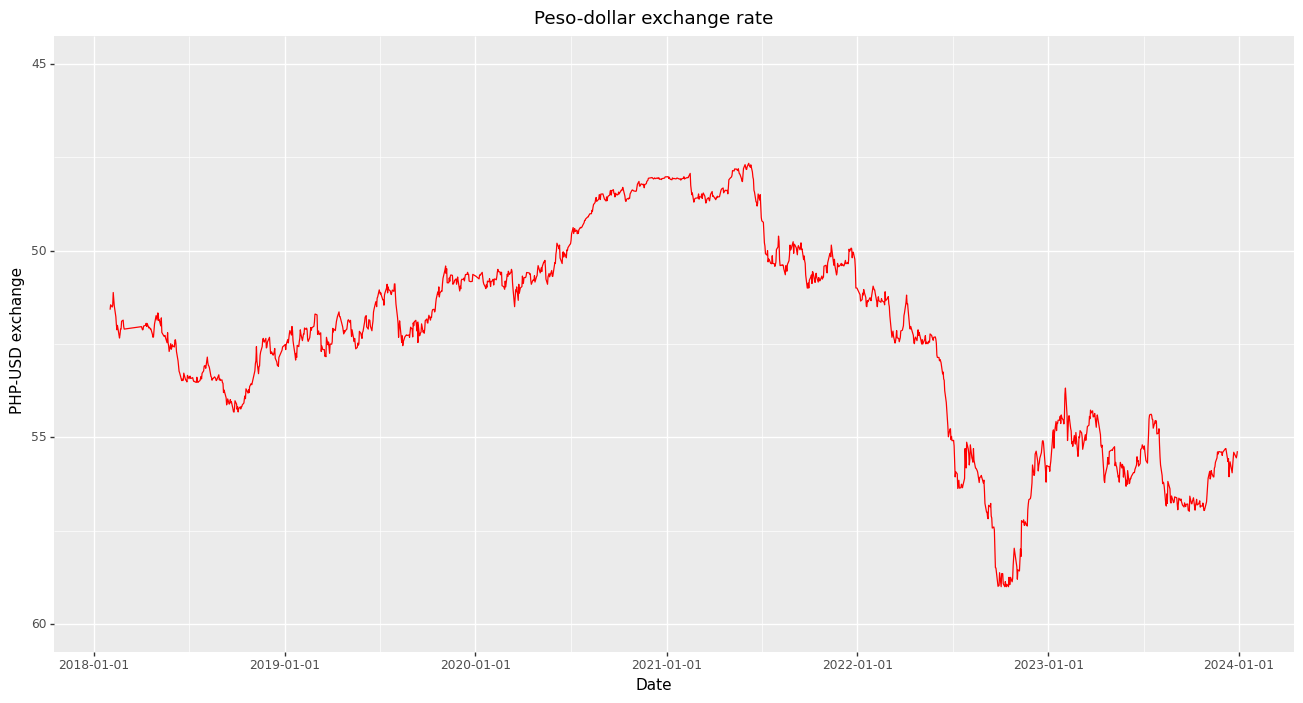

<ggplot: (671372412)>

In [34]:
(
    ggplot(df_final, aes('date', 'close')) +
           geom_line(color="red", stat="identity") +
           theme(figure_size=(16,8)) +
           ylim(60,45) +
           labs(x= "Date", y="PHP-USD exchange", title="Peso-dollar exchange rate")
)

## Save to CSV

Save your combined PHP-USD historical data into CSV.

In [35]:
# df_final.to_csv("forex_data.csv", date_format='%Y-%m-%d')